# Análisis predictivo y estrategias de retención para Model Fitness.

Este proyecto tiene como objetivo analizar los datos de clientes de Model Fitness para predecir la probabilidad de pérdida de clientes y desarrollar estrategias efectivas de retención. Utilizaremos técnicas de análisis de datos, modelado predictivo y visualización de datos para obtener insights valiosos y formular recomendaciones para mejorar la atención al cliente.

## Carga y exploración de datos.

### Importar las librerías necesarias.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

### Cargar los datos de los clientes.

In [2]:
gym = pd.read_csv('/datasets/gym_churn_us.csv')

### EDA: Análisis de la calidad de las características

In [3]:
print(f"Tamaño del DataFrame: {gym.shape} \n")
gym.head()

Tamaño del DataFrame: (4000, 14) 



,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [4]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

### EDA: Formular hipótesis

In [5]:
# nombres de columnas en minúsculas
gym.columns = gym.columns.str.lower()

# obtener estadísticas descriptivas
gym.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [6]:
# calcular los valores medios por grupo de cancelación
mean_values = gym.groupby('churn').mean()
print("\nValores medios por grupo de cancelación:")
print(mean_values)


Valores medios por grupo de cancelación:
         gender  near_location   partner  promo_friends     phone  \
churn                                                               
0      0.510037       0.873086  0.534195       0.353522  0.903709   
1      0.510839       0.768143  0.355325       0.183789  0.902922   

       contract_period  group_visits        age  avg_additional_charges_total  \
churn                                                                           
0             5.747193      0.464103  29.976523                    158.445715   
1             1.728558      0.268615  26.989632                    115.082899   

       month_to_end_contract  lifetime  avg_class_frequency_total  \
churn                                                               
0                   5.283089  4.711807                   2.024876   
1                   1.662582  0.990575                   1.474995   

       avg_class_frequency_current_month  
churn                               

Los valores medios por grupo de cancelación nos permiten observar diferencias significativas entre los usuarios que se quedan y los que cancelan su membresía.

- El género de los usuarios no parece tener un impacto significativo en la cancelación, ya que los valores medios son casi idénticos para ambos grupos.
- Los usuarios que viven o trabajan cerca del gimnasio son más propensos a continuar con su membresía.
- Los descuentos corporativos pueden influir en la retención.
- La promoción "trae a un/a amigo/a" es más común entre los usuarios que no cancelan.
- Los contratos a largo plazo pueden estar relacionados con una mayor retención.



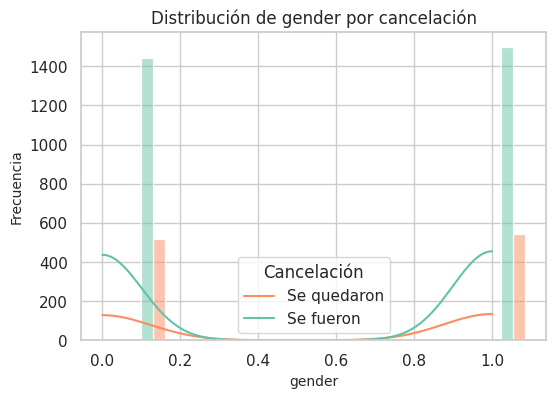

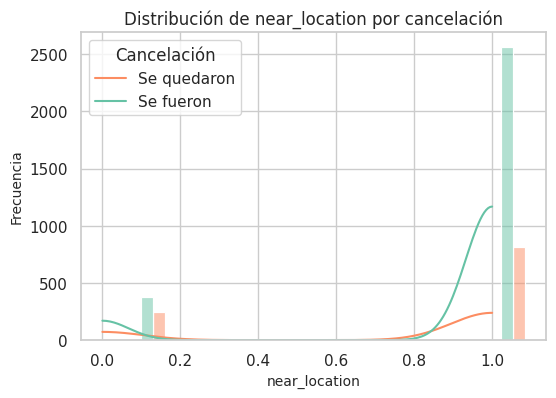

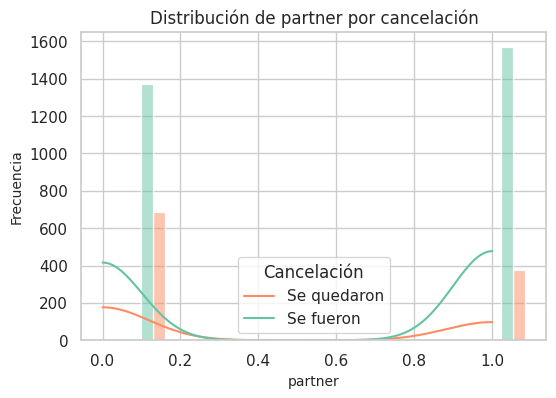

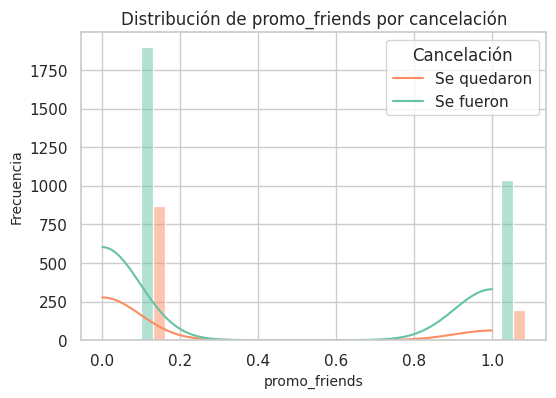

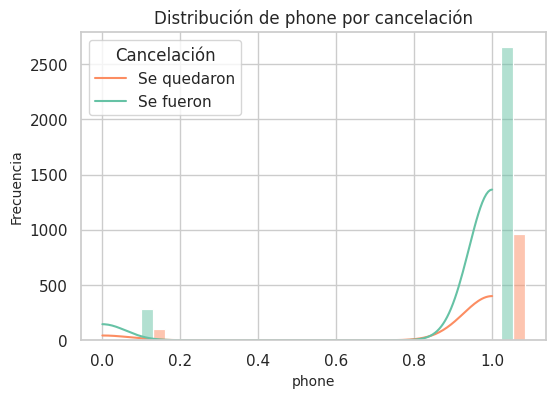

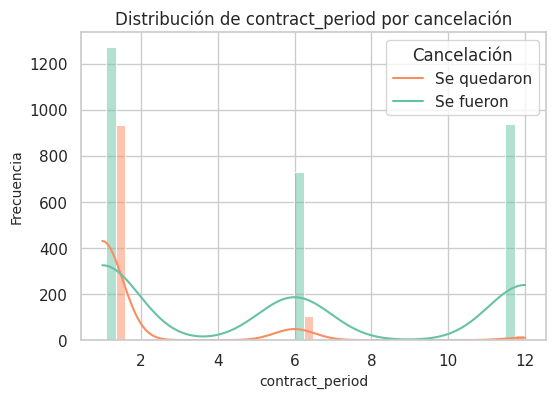

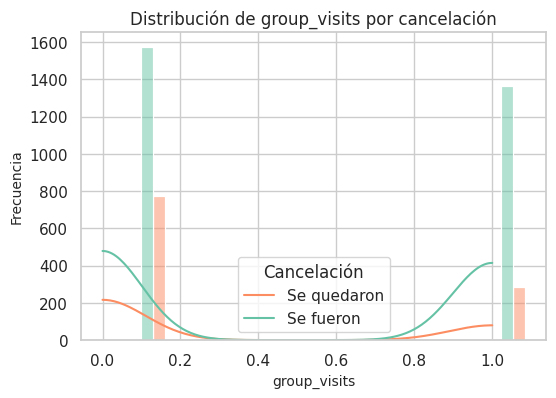

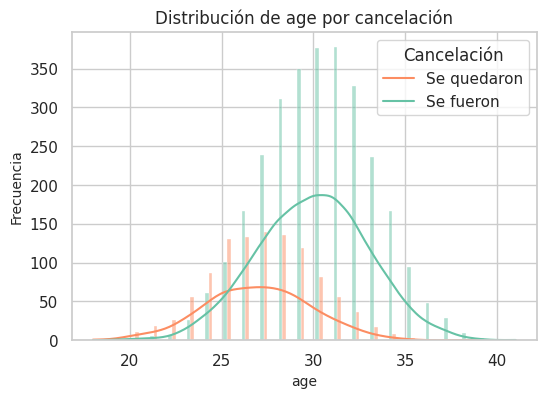

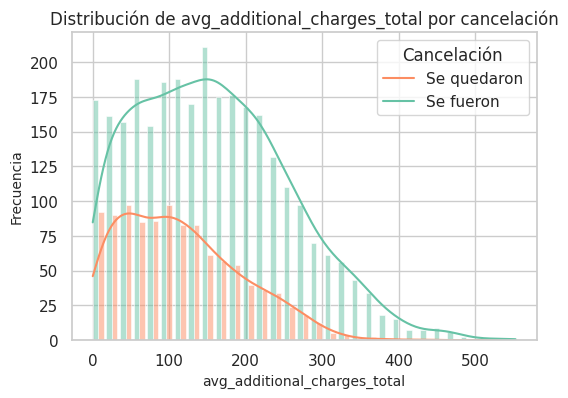

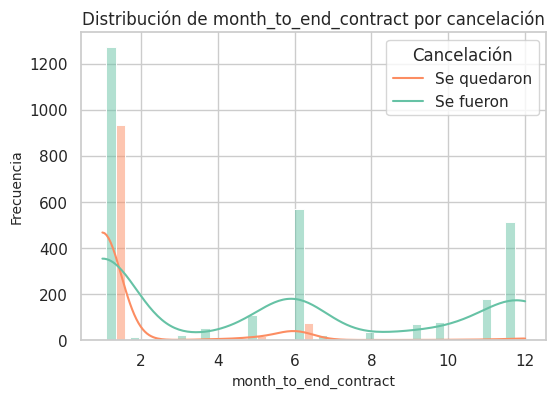

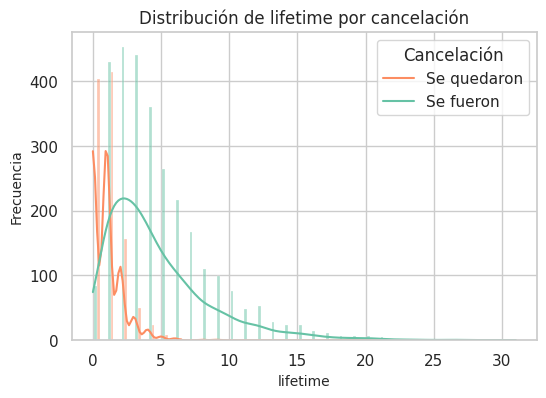

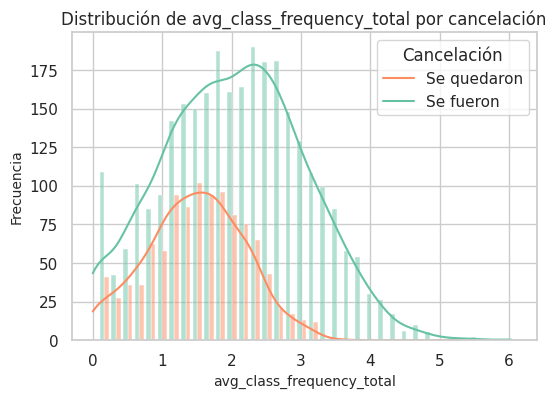

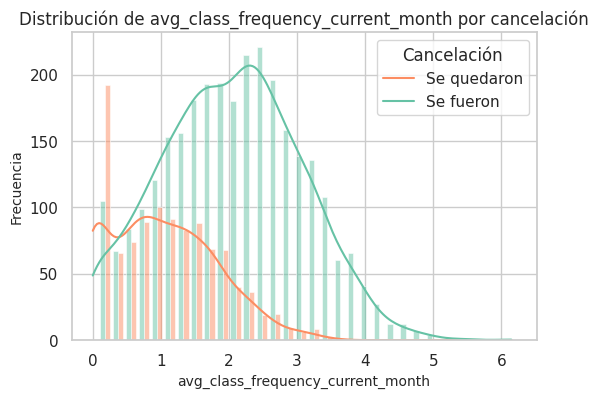

In [10]:
sns.set(style="whitegrid")

# Lista de las características a graficar
features = [
    'gender', 'near_location', 'partner', 'promo_friends', 'phone', 
    'contract_period', 'group_visits', 'age', 'avg_additional_charges_total', 
    'month_to_end_contract', 'lifetime', 'avg_class_frequency_total', 
    'avg_class_frequency_current_month'
]

# Crear figuras para cada característica
for feature in features:
    plt.figure(figsize=(6, 4))
    
    # Histograma para cada grupo
    sns.histplot(data=gym, x=feature, hue='churn', multiple='dodge', shrink=0.8, palette='Set2', kde=True)
    
    # Título y etiquetas
    plt.title(f'Distribución de {feature} por cancelación', fontsize=12)
    plt.xlabel(feature, fontsize=10)
    plt.ylabel('Frecuencia', fontsize=10)
    
    # Mostrar la gráfica
    plt.legend(title='Cancelación', labels=['Se quedaron', 'Se fueron'])
    plt.show()

Las gráficas son reflejo de los resultados de los valores medios calculados anteriormente, podemos destacar lo siguiente:
- las mujeres son más propensas a cancelar
- los clientes más jóvenes son más propensos a cancelar.
- los clientes con más gastos adicionales tienen más probabilidades de no cancelar. 
- la frecuencia de las clases no es necesariamente un factor determinante en la cancelación.

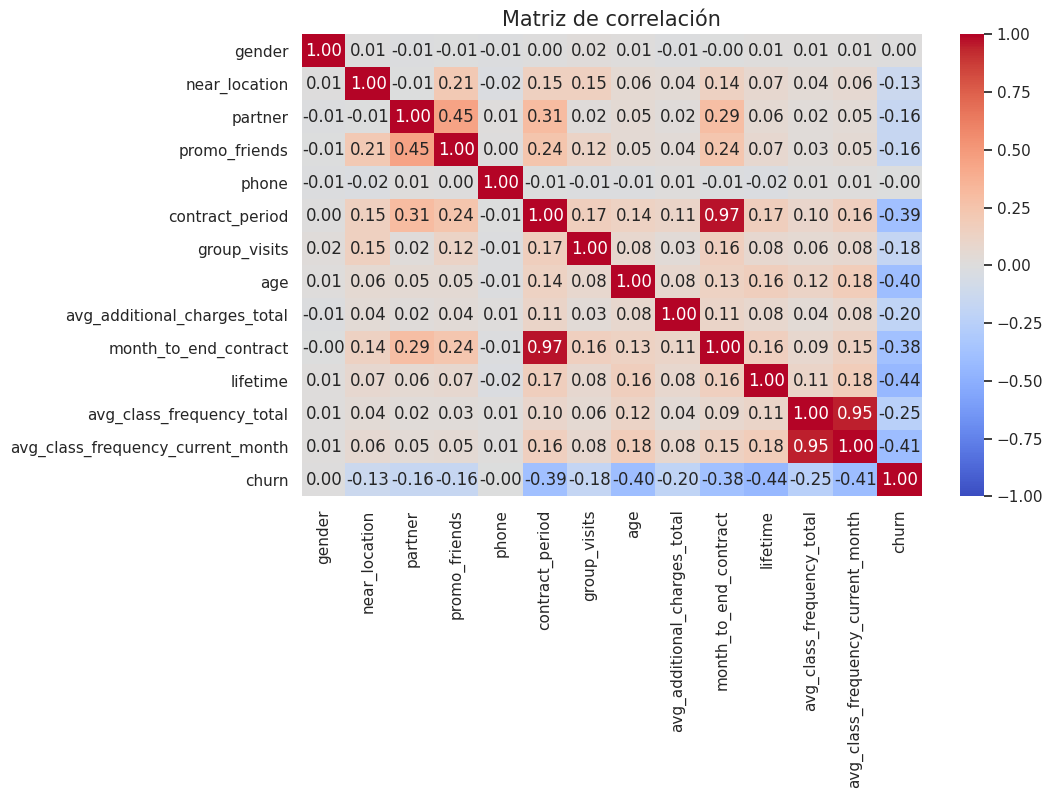

In [11]:
# matriz de correlación
correlation_matrix = gym.corr()

plt.figure(figsize=(10, 6))

# mapa de calor de la matriz de correlación
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, center=0)
plt.title('Matriz de correlación', fontsize=15)
plt.show()

El mapa de calor muestra la correlación entre diferentes variables de un conjunto de datos. El color rojo indica una correlación positiva, el azul indica una correlación negativa y el blanco indica una correlación nula.

Las variables más correlacionadas positivamente con el abandono del servicio son:

**Contratos y Tiempo**: Los usuarios con contratos más largos y más tiempo restante en sus contratos actuales tienen una menor probabilidad de cancelar su membresía. Esto sugiere que los contratos de largo plazo pueden ser una estrategia efectiva para mejorar la retención.

**Frecuencia de Uso**: Los usuarios que frecuentan más el gimnasio, tanto en términos de su promedio histórico como en el mes actual, son menos propensos a cancelar. Fomentar la actividad regular puede ser clave para la retención de clientes.

**Promociones y Proximidad**: Las promociones y la proximidad al gimnasio también son factores importantes. Los programas de descuentos corporativos y las promociones que involucran amigos pueden ser útiles para reducir la tasa de cancelación.

**Tiempo de Membresía**: La duración total como miembro del gimnasio es un fuerte indicador de retención, lo que sugiere que mantener a los usuarios comprometidos a lo largo del tiempo puede ser beneficioso.

### Preprocesamiento de datos.

In [12]:
# verificar valores ausentes
print(f"Valores nulos: \n{gym.isnull().sum()} \n")

# verificar valores duplicados
print(f"Duplicados encontrados: {gym.duplicated().sum()} \n")

gym = pd.get_dummies(gym)
print(f"Tamaño del DataFrame: {gym.shape}")
gym.head()

Valores nulos: 
gender                               0
near_location                        0
partner                              0
promo_friends                        0
phone                                0
contract_period                      0
group_visits                         0
age                                  0
avg_additional_charges_total         0
month_to_end_contract                0
lifetime                             0
avg_class_frequency_total            0
avg_class_frequency_current_month    0
churn                                0
dtype: int64 

Duplicados encontrados: 0 

Tamaño del DataFrame: (4000, 14)


,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


En esta parte se verifica la presencia de filas duplicadas en el DataFrame, lo cual es importante para evitar sesgos en el análisis debido a la repetición de datos.

convertir variables categóricas en variables dummy (variables indicadoras). Este proceso es crucial para preparar los datos para algoritmos de machine learning que no pueden manejar directamente variables categóricas.

## Construir un modelo para predecir la cancelación de usuarios

In [14]:
# divide los datos en características (la matriz X) y una variable objetivo (y)
X = gym.drop('churn', axis=1) 
y = gym['churn'] 

# divide los datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar las dimensiones de los conjuntos
print(f"Dimensiones del conjunto de entrenamiento: X_train = {X_train.shape}, y_train = {y_train.shape}")
print(f"Dimensiones del conjunto de prueba: X_test = {X_test.shape}, y_test = {y_test.shape}")

Dimensiones del conjunto de entrenamiento: X_train = (3200, 13), y_train = (3200,)
Dimensiones del conjunto de prueba: X_test = (800, 13), y_test = (800,)


In [15]:
# define la función que podrá generar nuestras métricas
def print_all_metrics(y_true, y_pred, y_proba, title = 'Métricas de clasificación'):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    
# define el algoritmo para el modelo de regresión logística
lr_model = LogisticRegression(max_iter=1000, random_state=42)
# entrena el modelo
lr_model.fit(X_train, y_train)
# utiliza el modelo entrenado para hacer previsiones
lr_predictions = lr_model.predict(X_test)
lr_probabilities = lr_model.predict_proba(X_test)[:,1]
# muestra todas las métricas
print_all_metrics(y_test, lr_predictions, lr_probabilities , title='Métricas de regresión logística:')

# define el algoritmo para el nuevo modelo de random forest
rf_model = RandomForestClassifier(random_state =42)
# entrena el modelo de random forest
rf_model.fit(X_train, y_train)
# utiliza el modelo entrenado para hacer previsiones
rf_predictions = rf_model.predict(X_test)
rf_probabilities = rf_model.predict_proba(X_test)[:,1]
# muestra todas las métricas
print_all_metrics(y_test, rf_predictions, rf_probabilities, title='\nMétricas de random forest:')

Métricas de regresión logística:
	Accuracy: 0.92
	Precision: 0.87
	Recall: 0.78

Métricas de random forest:
	Accuracy: 0.91
	Precision: 0.85
	Recall: 0.78


En términos de exactitud y precisión, la regresión logística tiene un rendimiento ligeramente superior al Bosque Aleatorio en este conjunto de datos aun asi este podría ofrecer ventajas en términos de capacidad para manejar datos no lineales y capturar interacciones más complejas entre las características, aunque en este caso particular no se reflejó en una mejora significativa en las métricas evaluadas.

Basado en las métricas proporcionadas y en el contexto general del proyecto, la regresión logística parece haber dado resultados ligeramente mejores en este caso particular.

## Crear clústeres de usuarios/as

In [16]:
X_cluster = gym.drop('churn', axis=1)  

# estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# define el modelo k_means con 5 clústeres
kmeans = KMeans(n_clusters=5, random_state=42)

# entrenar el modelo de K-means
kmeans.fit(X_scaled)

# predice los clústeres para las observaciones
cluster_labels = kmeans.predict(X_scaled)

# almacena etiquetas de clúster en el campo de nuestro conjunto de datos
gym['cluster'] = cluster_labels

# btiene las estadísticas de los valores medios de las características por clúster
cluster_means = gym.groupby('cluster').mean()
print(cluster_means)


           gender  near_location   partner  promo_friends  phone  \
cluster                                                            
0        0.502370       0.949447  0.829384       0.998420    1.0   
1        0.554556       0.849269  0.263217       0.052868    1.0   
2        0.499422       0.937572  0.737572       0.478613    1.0   
3        0.485738       0.718011  0.299919       0.018745    1.0   
4        0.523316       0.862694  0.471503       0.305699    0.0   

         contract_period  group_visits        age  \
cluster                                             
0               3.097946      0.448657  29.104265   
1               2.606299      0.436445  30.008999   
2              11.854335      0.546821  29.905202   
3               1.914425      0.276284  28.083945   
4               4.777202      0.427461  29.297927   

         avg_additional_charges_total  month_to_end_contract  lifetime  \
cluster                                                                  
0  

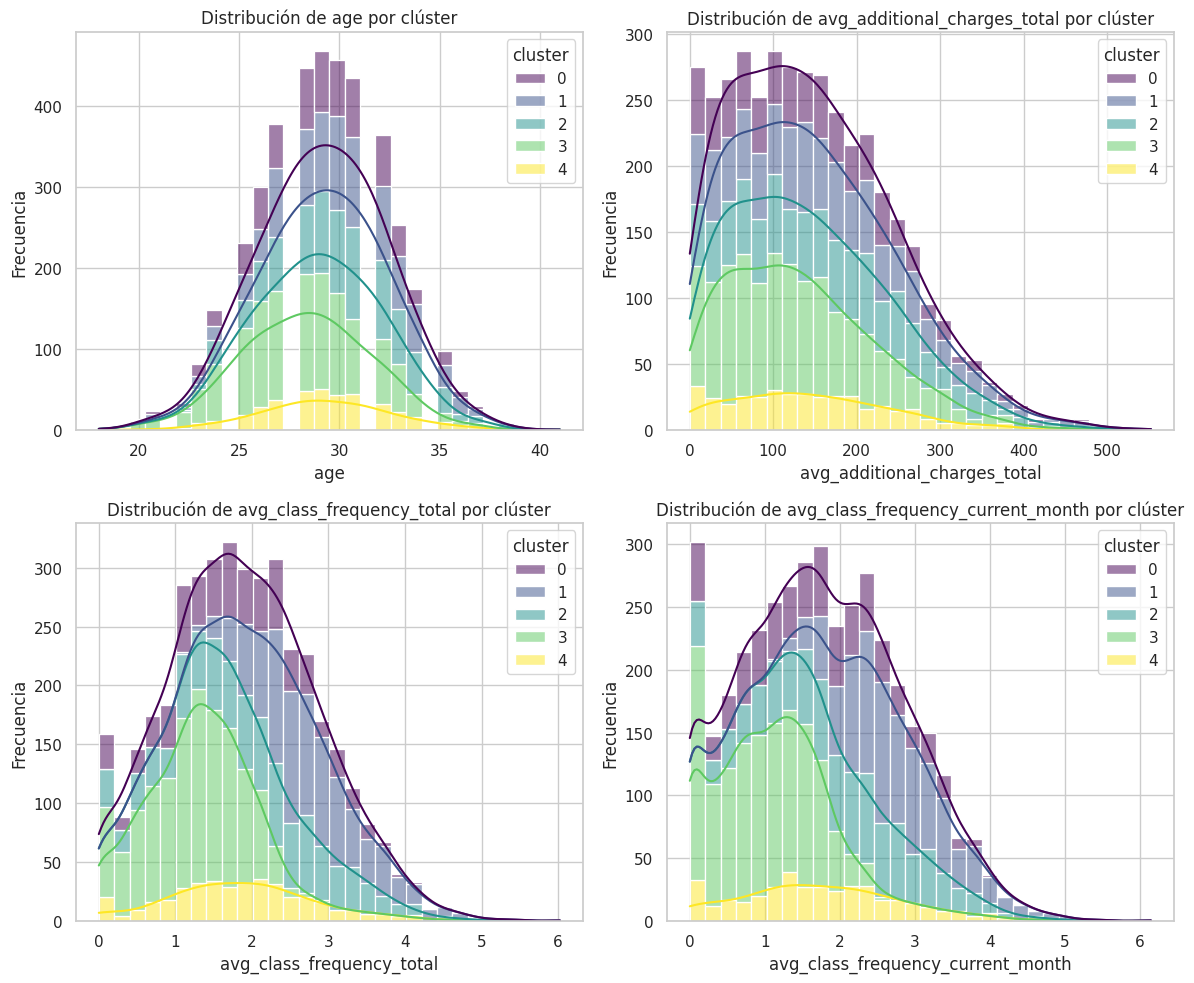

In [18]:
# definir las columnas de características numéricas para graficar
numeric_features = ['age', 'avg_additional_charges_total', 'avg_class_frequency_total', 'avg_class_frequency_current_month']

plt.figure(figsize=(12, 10))
sns.set(style='whitegrid')

for i, feature in enumerate(numeric_features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(data=gym, x=feature, hue='cluster', multiple='stack', kde=True, palette='viridis', bins=30)
    plt.title(f'Distribución de {feature} por clúster')
    plt.xlabel(feature)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

In [19]:
# tasa de cancelación por clúster
churn_rates = gym.groupby('cluster')['churn'].mean()

print(churn_rates)

cluster
0    0.246445
1    0.089989
2    0.021965
3    0.572942
4    0.266839
Name: churn, dtype: float64


## Conclusiones y recomendaciones

### Identificación de Clústeres y recomendaciones.

**Clúster 0: "Frequent Spenders"** (Visitantes moderados y gastadores)

*Características*: Visitas moderadas al gimnasio, participación en visitas grupales, y un gasto adicional considerable.

*Recomendaciones*: 
- Realizar encuestas periódicas para entender mejor sus necesidades y expectativas y ajustar las ofertas del gimnasio en consecuencia.
- Proveer ofertas y programas personalizados basados en el análisis de sus patrones de uso y comportamiento dentro del gimnasio.

**Clúster 1: "Highly Engaged"** (Altamente comprometidos)

*Características*: Alta frecuencia de visitas, compromiso con visitas grupales, y el menor índice de cancelación.

**Clúster 2: "Premium Members"** (Miembros premium)

*Características*: Alta frecuencia de visitas, largos periodos de contrato, y altos gastos adicionales.

*Recomendaciones*:
- Introducir programas de reconocimiento para los miembros más leales, como premios por longevidad de la membresía o por alcanzar ciertos hitos en su uso del gimnasio.
- Mantener una comunicación regular y personalizada con estos miembros para asegurar que se sientan valorados y escuchados.

**Clúster 3: "At-Risk Members"** (Miembros en riesgo de abandono)

*Características*: Baja frecuencia de visitas, menor participación en visitas grupales, y la mayor tasa de cancelación.

*Recomendaciones*:
- Ofrecer promociones o descuentos para aumentar la participación en visitas grupales y actividades dentro del gimnasio.
- Crear programas de fidelización personalizados que recompensen la frecuencia de visitas y el uso de servicios adicionales del gimnasio.
- Implementar un sistema de seguimiento personalizado, como llamadas o mensajes, para aquellos que muestran una disminución en la frecuencia de visitas.

**Clúster 4: "Moderate Users"** (Usuarios moderadamente activos)

*Características*: Frecuencia de visitas y participación en visitas grupales intermedias, y una tasa de cancelación moderada.

*Recomendaciones*: 
- Realizar encuestas periódicas para entender mejor sus necesidades y expectativas y ajustar las ofertas del gimnasio en consecuencia.
- Proveer ofertas y programas personalizados basados en el análisis de sus patrones de uso y comportamiento dentro del gimnasio.


### Implementación de estrategias de marketing específicas

**Campañas de re-engagement:**
Enviar campañas de correo electrónico dirigidas a los miembros del Clúster 3 con ofertas especiales y recordatorios de los beneficios de las visitas regulares.

**Programas de referidos:**
Ampliar los programas de referidos para los miembros más leales (Clústeres 2 y 1), incentivando a estos clientes a traer nuevos miembros.

**Eventos y actividades exclusivas:**
Organizar eventos exclusivos y actividades especiales para los miembros del Clúster 0 y 4 para aumentar su compromiso y sentido de comunidad.

**Mejorar la experiencia general del cliente:**
- Asegurarse de que todos los servicios adicionales (cafetería, productos deportivos, masajes, etc.) estén alineados con las preferencias de los clientes y se promocionen adecuadamente.
- Capacitar a los entrenadores y al personal para que puedan identificar señales tempranas de desinterés y actuar proactivamente para mantener a los clientes comprometidos.